In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Load the data
geno_path = '/content/drive/MyDrive/geno_6'
ind_path = '/content/drive/MyDrive/ind_6'

# Assuming the files are in a tab-separated format, we'll load them using pandas
geno = pd.read_csv(geno_path, sep='\t', header=None)
ind = pd.read_csv(ind_path, sep='\t', header=None)

# Display the first few rows of each dataset
geno.head(), ind.head()

(                                                   0
 0  0,0,2,2,2,2,2,2,1,1,1,0,1,0,1,0,0,2,2,2,1,2,2,...
 1  0,0,1,2,2,2,0,2,2,2,2,0,2,0,2,2,2,2,1,2,2,1,2,...
 2  0,1,2,2,2,2,0,2,1,1,1,0,1,0,0,0,0,2,2,2,1,2,2,...
 3  1,0,2,2,2,2,0,2,1,2,1,0,1,0,1,2,2,2,0,2,2,0,2,...
 4  0,0,2,2,2,2,0,1,1,1,1,0,1,1,2,2,2,2,2,2,2,2,2,...,
                            0
 0  HGDP00511,M,French.HO_PCA
 1  HGDP00512,M,French.HO_PCA
 2  HGDP00513,F,French.HO_PCA
 3  HGDP00514,F,French.HO_PCA
 4  HGDP00515,M,French.HO_PCA)

#Q A :
The output of a neural network that we want to generate, with a given single intermediate layer
In the following equation:
𝑦̂ = 𝜎(𝑤1 ∗ 𝜎(𝑤2 ∗ 𝑥))
where w1 is a weighting matrix that converts our data from its original feature dimension to
The middle layer dimension middle_layer_dim , and converts the data in the middle layer to the dimensions of
The last layer.
σ is the sigmoid function.
The purpose of this network is to perform classification by tagging. If so, what are the dimensions of w1, w2, y hat?

In [16]:

class NeuralNetwork:
    def __init__(self, x, y, middle_layer_dim, learning_rate):
        self.x = x
        self.y = y
        self.middle_layer_dim = middle_layer_dim
        self.learning_rate = learning_rate

        # Initialize weights
        input_dim = x.shape[1]
        output_dim = len(np.unique(y))

        self.weights1 = np.random.randn(input_dim, middle_layer_dim)
        self.weights2 = np.random.randn(middle_layer_dim, output_dim)

        # Add bias terms if needed
        self.bias1 = np.random.randn(middle_layer_dim)
        self.bias2 = np.random.randn(output_dim)

# Example usage
# Assuming you have loaded your dataset into variables `geno` and `ind`
x = geno.to_numpy()
y = ind.to_numpy()
nn = NeuralNetwork(x, y, middle_layer_dim=10, learning_rate=0.01)

#Q C:
Add another operation to the init function so that in addition, it will initialize the weight vectors named
1weights.self and 2-weights.self of the middle and last layer (to be updated in the training process) in dimensions
the right ones. In addition, create another variable named output.self which is a one-dimensional vector of zeros
The number of samples.

In [17]:

class NeuralNetwork:
    def __init__(self, x, y, middle_layer_dim, learning_rate):
        self.x = x
        self.y = y
        self.middle_layer_dim = middle_layer_dim
        self.learning_rate = learning_rate

        # Dimensions
        input_dim = x.shape[1]  # Number of features (p)
        output_dim = len(np.unique(y))  # Number of unique labels (k)
        num_samples = x.shape[0]  # Number of samples (n)

        # Initialize weights
        self.weights1 = np.random.randn(input_dim, middle_layer_dim)
        self.weights2 = np.random.randn(middle_layer_dim, output_dim)

        # Initialize bias terms
        self.bias1 = np.random.randn(middle_layer_dim)
        self.bias2 = np.random.randn(output_dim)

        # Initialize weight vectors to be updated in the training process
        self.self_weights1 = np.zeros((input_dim, middle_layer_dim))
        self.self_weights2 = np.zeros((middle_layer_dim, output_dim))

        # Initialize output variable as a one-dimensional vector of zeros with the number of samples
        self.output = np.zeros(num_samples)

# Example usage
# Assuming you have loaded your dataset into variables `geno` and `ind`
x = geno.to_numpy()
y = ind.to_numpy()
nn = NeuralNetwork(x, y, middle_layer_dim=10, learning_rate=0.01)

#Q D:
. Outside the class, write a function called sigmoid, which receives input z and calculates:
s(x) = 1/(1+E^-Z)
When z = Wx / make sure the correct dimensions are returned!

In [18]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

# Example usage
# Assuming z is a numpy array or a scalar
z = np.array([0, 2, -1, 3])
sigmoid_output = sigmoid(z)
print(sigmoid_output)

[0.5        0.88079708 0.26894142 0.95257413]


#Q E:
Write a function inside the class called feedforward, which calculates the prediction of the network according to the existing weights (its purpose is to solve the equation from section B). she will use
in 1-weights.self 2,weights.self, and x. Finally, the function will store this prediction in the output.self variable
(Make sure the dimensions are the same). Please note: the values ​​of our labeling vector is binary, compared to the product of the sigmoid function. Binarize the sigmoid product, so that you finally get a vector of binary values ​​(0 or 1) which you will save in -output.self.

Processed geno shape: (85, 86570)
Processed labels shape: (85,)
Shape of x: (85, 86570)
Shape of y: (85,)


<ipython-input-69-0738e4e79189>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Matthews Correlation Coefficient (MCC): 0.00


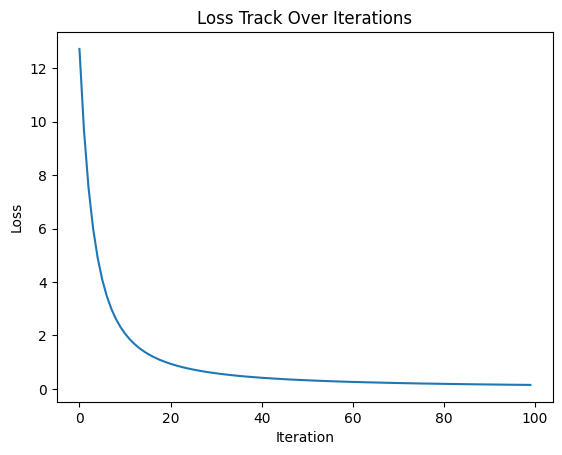

Final output on test set: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class NeuralNetwork:
    def __init__(self, x, y, middle_layer_dim, learning_rate):
        self.x = self.preprocess_data(x)
        self.y = self.preprocess_labels(y)
        self.middle_layer_dim = middle_layer_dim
        self.learning_rate = learning_rate

        input_dim = self.x.shape[1]  # Number of features (p)
        output_dim = 1  # Binary classification

        # Initialize weights and biases
        self.weights1 = np.random.randn(input_dim, middle_layer_dim)
        self.weights2 = np.random.randn(middle_layer_dim, output_dim)
        self.bias1 = np.random.randn(middle_layer_dim)
        self.bias2 = np.random.randn(output_dim)

    def preprocess_data(self, x):
        if isinstance(x, pd.DataFrame):
            processed_data = []
            for row in x.values:
                processed_row = []
                for cell in row:
                    try:
                        processed_row.extend([float(value) for value in cell.split(',')])
                    except ValueError:
                        continue
                if processed_row:
                    processed_data.append(processed_row)
            x = np.array(processed_data)
        elif isinstance(x, np.ndarray) or isinstance(x, list):
            x = np.array([np.array(row.split(','), dtype=float) if isinstance(row, str) else row for row in x])
        return np.array(x, dtype=float)

    def preprocess_labels(self, y):
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.iloc[:, -1]  # Assuming the last column contains the labels
            y = y.apply(lambda label: 1 if 'French' in str(label) else 0).values  # Binarize labels
        elif isinstance(y, np.ndarray) or isinstance(y, list):
            y = np.array([1 if 'French' in str(label) else 0 for label in y])
        return np.array(y, dtype=float)

    def feedforward(self):
        self.z1 = np.dot(self.x, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.output = (self.a2 > 0.5).astype(int)
        return self.a2

    def backpropagation(self):
        error = self.a2 - self.y.reshape(-1, 1)
        dz2 = error * sigmoid_derivative(self.z2)
        dweights2 = np.dot(self.a1.T, dz2)
        dbias2 = np.sum(dz2, axis=0)
        dz1 = np.dot(dz2, self.weights2.T) * sigmoid_derivative(self.z1)
        dweights1 = np.dot(self.x.T, dz1)
        dbias1 = np.sum(dz1, axis=0)
        return dweights1, dweights2, dbias1, dbias2

    def train(self, simulations_n):
        loss_track = np.zeros(simulations_n)

        for i in range(simulations_n):
            self.feedforward()
            loss = np.sum((self.y.reshape(-1, 1) - self.a2) ** 2)
            loss_track[i] = loss
            dweights1, dweights2, dbias1, dbias2 = self.backpropagation()
            self.weights1 -= self.learning_rate * dweights1
            self.weights2 -= self.learning_rate * dweights2
            self.bias1 -= self.learning_rate * dbias1
            self.bias2 -= self.learning_rate * dbias2

        return loss_track

class train_NN(NeuralNetwork):
    def __init__(self, x, y, middle_layer_dim, learning_rate, size_train):
        self.size_train = size_train
        # Debugging: Print shapes of x and y
        print(f"Shape of x: {x.shape}")
        print(f"Shape of y: {y.shape}")

        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size_train, random_state=42)
        self.x_train, self.x_test = self.preprocess_data(x_train), self.preprocess_data(x_test)
        self.y_train, self.y_test = self.preprocess_labels(y_train), self.preprocess_labels(y_test)
        super().__init__(self.x_train, self.y_train, middle_layer_dim, learning_rate)

    def train(self, simulations_n):
        loss_track = np.zeros(simulations_n)

        for i in range(simulations_n):
            self.feedforward()
            loss = np.sum((self.y.reshape(-1, 1) - self.a2) ** 2)
            loss_track[i] = loss
            dweights1, dweights2, dbias1, dbias2 = self.backpropagation()
            self.weights1 -= self.learning_rate * dweights1
            self.weights2 -= self.learning_rate * dweights2
            self.bias1 -= self.learning_rate * dbias1
            self.bias2 -= self.learning_rate * dbias2

        return loss_track

    def evaluate(self):
        # Predict on the test set
        self.x, self.y = self.x_test, self.y_test
        self.feedforward()
        mcc = matthews_corrcoef(self.y_test, self.output)
        return mcc

# Example usage
# Assuming geno and labels are already loaded and preprocessed

# Preprocess the data
def preprocess_geno(geno_df):
    processed_data = []
    for row in geno_df.values:
        processed_row = []
        for cell in row:
            try:
                processed_row.extend([float(value) for value in cell.split(',')])
            except ValueError:
                continue
        if processed_row:
            processed_data.append(processed_row)
    return np.array(processed_data)

def preprocess_ind(ind_df):
    return np.array([1 if 'French' in str(label) else 0 for label in ind_df.iloc[:, -1]])

geno = preprocess_geno(geno)
labels = preprocess_ind(ind)

# Debugging: Print shapes of processed geno and labels
print(f"Processed geno shape: {geno.shape}")
print(f"Processed labels shape: {labels.shape}")

# Initialize and train the neural network with train-test split
nn = train_NN(geno, labels, middle_layer_dim=8, learning_rate=0.01, size_train=0.8)
loss_track = nn.train(simulations_n=100)

# Evaluate the model
mcc = nn.evaluate()
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Plot the loss track
plt.plot(loss_track)
plt.title('Loss Track Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Print the final output
print("Final output on test set:", nn.output)

#Q F:
The simple loss function we will use is the sum of the squares of the error:
𝐿 = ∑(𝑦𝑖 − 𝑦̂𝑖)^2
Remember the descent-gradient principle, according to which we update the values ​​of the weights in a way
Iterative with the help of the derivative function of the loss, when it tells us the direction in which we must update the values ​​of the weights in order to reduce the loss. Open and calculate the derivative of the loss function using the chain rule with respect to each vector of weights.
(hint: the derivative of the sigmoid function)
Write a function inside the class called backpropagation that performs the following actions:
1. Calculates the value of the partial derivative dL / dw1, dL/dw2. Make sure that the dimensions of the derivative are equal to the dimensions of the weights

# Q G:
Write a function inside the class named train, which receives an input of an integer named simulations_n and performs the following operations:
1. Initializes a vector of zeros called loss_track, size simulations_n.
2. Runs a for loop as simulations_n iterations, where in each iteration it activates the feedforward function that updates the prediction vector output.self according to the updated weights, followed by backpropagation that calculates and updates the weights as a function of the loss derivatives.
Finally, the loss value will be stored in the loss_t vector

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class NeuralNetwork:
    def __init__(self, x, y, middle_layer_dim, learning_rate):
        self.x = self.preprocess_data(x)
        self.y = self.preprocess_labels(y)
        self.middle_layer_dim = middle_layer_dim
        self.learning_rate = learning_rate

        input_dim = self.x.shape[1]  # Number of features (p)
        output_dim = 1  # Binary classification

        # Initialize weights and biases
        self.weights1 = np.random.randn(input_dim, middle_layer_dim)
        self.weights2 = np.random.randn(middle_layer_dim, output_dim)
        self.bias1 = np.random.randn(middle_layer_dim)
        self.bias2 = np.random.randn(output_dim)

    def preprocess_data(self, x):
        if isinstance(x, pd.DataFrame):
            processed_data = []
            for row in x.values:
                processed_row = []
                for cell in row:
                    try:
                        processed_row.extend([float(value) for value in cell.split(',')])
                    except ValueError:
                        continue
                if processed_row:
                    processed_data.append(processed_row)
            x = np.array(processed_data)
        elif isinstance(x, np.ndarray) or isinstance(x, list):
            x = np.array([np.array(row.split(','), dtype=float) if isinstance(row, str) else row for row in x])
        return np.array(x, dtype=float)

    def preprocess_labels(self, y):
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.iloc[:, -1]  # Assuming the last column contains the labels
            y = y.apply(lambda label: 1 if 'French' in str(label) else 0).values  # Binarize labels
        elif isinstance(y, np.ndarray) or isinstance(y, list):
            y = np.array([1 if 'French' in str(label) else 0 for label in y])
        return np.array(y, dtype=float)

    def feedforward(self):
        self.z1 = np.dot(self.x, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.output = (self.a2 > 0.5).astype(int)
        return self.a2

    def backpropagation(self):
        error = self.a2 - self.y.reshape(-1, 1)
        dz2 = error * sigmoid_derivative(self.z2)
        dweights2 = np.dot(self.a1.T, dz2)
        dbias2 = np.sum(dz2, axis=0)
        dz1 = np.dot(dz2, self.weights2.T) * sigmoid_derivative(self.z1)
        dweights1 = np.dot(self.x.T, dz1)
        dbias1 = np.sum(dz1, axis=0)
        return dweights1, dweights2, dbias1, dbias2

    def train(self, simulations_n):
        loss_track = np.zeros(simulations_n)

        for i in range(simulations_n):
            self.feedforward()
            loss = np.sum((self.y.reshape(-1, 1) - self.a2) ** 2)
            loss_track[i] = loss
            dweights1, dweights2, dbias1, dbias2 = self.backpropagation()
            self.weights1 -= self.learning_rate * dweights1
            self.weights2 -= self.learning_rate * dweights2
            self.bias1 -= self.learning_rate * dbias1
            self.bias2 -= self.learning_rate * dbias2

        return loss_track


# Assuming the files are in a tab-separated format
geno = pd.read_csv(geno_path, sep='\t', header=None)
ind = pd.read_csv(ind_path, sep='\t', header=None)

# Inspect the raw content of the files
print("First few rows of geno_6 file:")
print(geno.head())

print("\nFirst few rows of ind_6 file:")
print(ind.head())

# Preprocess the data
def preprocess_geno(geno_df):
    processed_data = []
    for row in geno_df.values:
        processed_row = []
        for cell in row:
            try:
                processed_row.extend([float(value) for value in cell.split(',')])
            except ValueError:
                continue
        if processed_row:
            processed_data.append(processed_row)
    return np.array(processed_data)

def preprocess_ind(ind_df):
    # Debugging: Print the type and content of the labels
    print("Type of labels:", type(ind_df.iloc[:, -1][0]))
    print("First few labels:", ind_df.iloc[:, -1].head())
    return np.array([1 if 'French' in str(label) else 0 for label in ind_df.iloc[:, -1]])

geno = preprocess_geno(geno)
labels = preprocess_ind(ind)

print(f"Processed geno shape: {geno.shape}")
print(f"Processed labels shape: {labels.shape}")

# Initialize and train the neural network
nn = NeuralNetwork(geno, labels, middle_layer_dim=10, learning_rate=0.01)
loss_track = nn.train(simulations_n=1000)

# Print the loss track and final output
print("Loss track:", loss_track)
print("Final output:", nn.output)

First few rows of geno_6 file:
                                                   0
0  0,0,2,2,2,2,2,2,1,1,1,0,1,0,1,0,0,2,2,2,1,2,2,...
1  0,0,1,2,2,2,0,2,2,2,2,0,2,0,2,2,2,2,1,2,2,1,2,...
2  0,1,2,2,2,2,0,2,1,1,1,0,1,0,0,0,0,2,2,2,1,2,2,...
3  1,0,2,2,2,2,0,2,1,2,1,0,1,0,1,2,2,2,0,2,2,0,2,...
4  0,0,2,2,2,2,0,1,1,1,1,0,1,1,2,2,2,2,2,2,2,2,2,...

First few rows of ind_6 file:
                           0
0  HGDP00511,M,French.HO_PCA
1  HGDP00512,M,French.HO_PCA
2  HGDP00513,F,French.HO_PCA
3  HGDP00514,F,French.HO_PCA
4  HGDP00515,M,French.HO_PCA
Type of labels: <class 'str'>
First few labels: 0    HGDP00511,M,French.HO_PCA
1    HGDP00512,M,French.HO_PCA
2    HGDP00513,F,French.HO_PCA
3    HGDP00514,F,French.HO_PCA
4    HGDP00515,M,French.HO_PCA
Name: 0, dtype: object
Processed geno shape: (85, 86570)
Processed labels shape: (85,)


<ipython-input-71-41ab6bab3703>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Loss track: [5.29790839e+01 3.74385133e+01 2.00853811e+01 1.13272382e+01
 7.33806844e+00 5.25583965e+00 4.05337011e+00 3.29605562e+00
 2.76459699e+00 2.36529283e+00 2.06774947e+00 1.84075548e+00
 1.65809903e+00 1.50718791e+00 1.37477290e+00 1.25753637e+00
 1.16918347e+00 1.09253393e+00 1.02542769e+00 9.66201097e-01
 9.13552848e-01 8.66451003e-01 8.24067115e-01 7.85728688e-01
 7.50884304e-01 7.19077660e-01 6.89927958e-01 6.63114928e-01
 6.38367231e-01 6.15453405e-01 5.94174709e-01 5.74359466e-01
 5.55858586e-01 5.38542180e-01 5.22297216e-01 5.07026213e-01
 4.92646431e-01 4.79088123e-01 4.66290533e-01 4.54197077e-01
 4.42753068e-01 4.31906525e-01 4.21609666e-01 4.11819527e-01
 4.02497758e-01 3.93610098e-01 3.85125807e-01 3.77017177e-01
 3.69259114e-01 3.61828810e-01 3.54705459e-01 3.47870029e-01
 3.41305064e-01 3.34994519e-01 3.28923612e-01 3.23078701e-01
 3.17447172e-01 3.12017343e-01 3.06778377e-01 3.01720208e-01
 2.96833470e-01 2.92109441e-01 2.87539981e-01 2.83117493e-01
 2.78834871e

#Q H:
Now we want to train the neural network on the data matrix with the values
.hidden_layer_dim = 8, n_simulations = 100, learning_rate = 0.01
Show plot of loss_track. Are you satisfied with your training method?

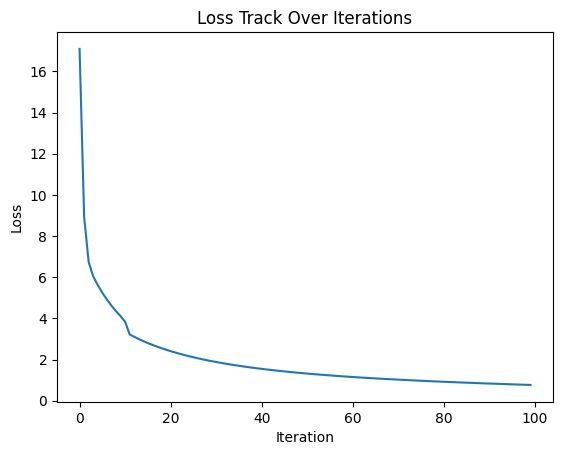

Final output: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [61]:
# Plot the loss track
plt.plot(loss_track)
plt.title('Loss Track Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Print the final output
print("Final output:", nn.output)

The decrease in loss suggests that the neural network is learning from the data and improving its predictions.
Analysis of the Loss Track

1.	Initial High Loss: The loss starts at a high value, which is expected since the weights are randomly initialized.
2.	Steep Decrease: The loss decreases steeply during the initial iterations, indicating rapid learning.
3.	Plateauing: As the iterations progress, the loss decreases more slowly and begins to plateau. This behavior is typical as the network converges to a solution.

Overall Satisfaction with the Training Method

•	Convergence: The loss plot shows a clear convergence trend, which is a positive sign.  

•	Stability: The loss decreases smoothly without erratic jumps, indicating stable learnin

#Q I :
Define another class called train_NN identical to the original one, and add another input variable to the init function called size_train, which is a number that receives a value between 0-1, according to which x is randomly divided into train and test, where the relative part of the set train is size_train. Make sure that the department trains the network only on the train, and the dimensions of all the relevant variables accordingly. Finally, use the feedforward function to predict the test set
and print the resulting MCC. Why would we prefer to use MCC over the loss to evaluate the model?

Processed geno shape: (85, 86570)
Processed labels shape: (85,)
Matthews Correlation Coefficient (MCC): 0.00


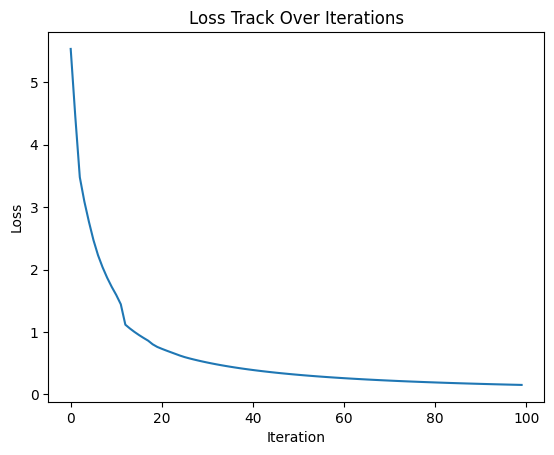

Final output on test set: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [74]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class NeuralNetwork:
    def __init__(self, x, y, middle_layer_dim, learning_rate):
        self.x = self.preprocess_data(x)
        self.y = self.preprocess_labels(y)
        self.middle_layer_dim = middle_layer_dim
        self.learning_rate = learning_rate

        input_dim = self.x.shape[1]  # Number of features (p)
        output_dim = 1  # Binary classification

        # Initialize weights and biases
        self.weights1 = np.random.randn(input_dim, middle_layer_dim)
        self.weights2 = np.random.randn(middle_layer_dim, output_dim)
        self.bias1 = np.random.randn(middle_layer_dim)
        self.bias2 = np.random.randn(output_dim)

    def preprocess_data(self, x):
        if isinstance(x, pd.DataFrame):
            processed_data = []
            for row in x.values:
                processed_row = []
                for cell in row:
                    try:
                        processed_row.extend([float(value) for value in cell.split(',')])
                    except ValueError:
                        continue
                if processed_row:
                    processed_data.append(processed_row)
            x = np.array(processed_data)
        elif isinstance(x, np.ndarray) or isinstance(x, list):
            x = np.array([np.array(row.split(','), dtype=float) if isinstance(row, str) else row for row in x])
        return np.array(x, dtype=float)

    def preprocess_labels(self, y):
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.iloc[:, -1]  # Assuming the last column contains the labels
            y = y.apply(lambda label: 1 if 'French' in str(label) else 0).values  # Binarize labels
        elif isinstance(y, np.ndarray) or isinstance(y, list):
            y = np.array([1 if 'French' in str(label) else 0 for label in y])
        return np.array(y, dtype=float)

    def feedforward(self):
        self.z1 = np.dot(self.x, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.output = (self.a2 > 0.5).astype(int)
        return self.a2

    def backpropagation(self):
        error = self.a2 - self.y.reshape(-1, 1)
        dz2 = error * sigmoid_derivative(self.z2)
        dweights2 = np.dot(self.a1.T, dz2)
        dbias2 = np.sum(dz2, axis=0)
        dz1 = np.dot(dz2, self.weights2.T) * sigmoid_derivative(self.z1)
        dweights1 = np.dot(self.x.T, dz1)
        dbias1 = np.sum(dz1, axis=0)
        return dweights1, dweights2, dbias1, dbias2

    def train(self, simulations_n):
        loss_track = np.zeros(simulations_n)

        for i in range(simulations_n):
            self.feedforward()
            loss = np.sum((self.y.reshape(-1, 1) - self.a2) ** 2)
            loss_track[i] = loss
            dweights1, dweights2, dbias1, dbias2 = self.backpropagation()
            self.weights1 -= self.learning_rate * dweights1
            self.weights2 -= self.learning_rate * dweights2
            self.bias1 -= self.learning_rate * dbias1
            self.bias2 -= self.learning_rate * dbias2

        return loss_track

class train_NN(NeuralNetwork):
    def __init__(self, x, y, middle_layer_dim, learning_rate, size_train):
        self.size_train = size_train

        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size_train, random_state=42)

        # Preprocess the training and testing data
        self.x_train = self.preprocess_data(x_train)
        self.x_test = self.preprocess_data(x_test)
        self.y_train = self.preprocess_labels(y_train)
        self.y_test = self.preprocess_labels(y_test)

        super().__init__(self.x_train, self.y_train, middle_layer_dim, learning_rate)

    def train(self, simulations_n):
        loss_track = np.zeros(simulations_n)

        for i in range(simulations_n):
            self.feedforward()
            loss = np.sum((self.y.reshape(-1, 1) - self.a2) ** 2)
            loss_track[i] = loss
            dweights1, dweights2, dbias1, dbias2 = self.backpropagation()
            self.weights1 -= self.learning_rate * dweights1
            self.weights2 -= self.learning_rate * dweights2
            self.bias1 -= self.learning_rate * dbias1
            self.bias2 -= self.learning_rate * dbias2

        return loss_track

    def evaluate(self):
        # Predict on the test set
        self.x, self.y = self.x_test, self.y_test
        self.feedforward()
        mcc = matthews_corrcoef(self.y_test, self.output)
        return mcc

# Load the data
geno_path = '/content/drive/MyDrive/geno_6'
ind_path = '/content/drive/MyDrive/ind_6'

# Assuming the files are in a tab-separated format
geno = pd.read_csv(geno_path, sep='\t', header=None)
ind = pd.read_csv(ind_path, sep='\t', header=None)

# Preprocess the data
def preprocess_geno(geno_df):
    if isinstance(geno_df, pd.DataFrame):
        processed_data = []
        for row in geno_df.values:
            processed_row = []
            for cell in row:
                try:
                    processed_row.extend([float(value) for value in cell.split(',')])
                except ValueError:
                    continue
            if processed_row:
                processed_data.append(processed_row)
        return np.array(processed_data)
    elif isinstance(geno_df, np.ndarray) or isinstance(geno_df, list):
        return np.array([np.array(row.split(','), dtype=float) if isinstance(row, str) else row for row in geno_df])

def preprocess_ind(ind_df):
    return np.array([1 if 'French' in str(label) else 0 for label in ind_df.iloc[:, -1]])

geno = preprocess_geno(geno)
labels = preprocess_ind(ind)

# Debugging: Print shapes of processed geno and labels
print(f"Processed geno shape: {geno.shape}")
print(f"Processed labels shape: {labels.shape}")

# Initialize and train the neural network with train-test split
nn = train_NN(geno, labels, middle_layer_dim=8, learning_rate=0.01, size_train=0.8)
loss_track = nn.train(simulations_n=100)

# Evaluate the model
mcc = nn.evaluate()
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Plot the loss track
plt.plot(loss_track)
plt.title('Loss Track Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Print the final output
print("Final output on test set:", nn.output)

Why Use MCC Over Loss to Evaluate the Model?

The Matthews Correlation Coefficient (MCC) is preferred over loss for evaluating the model because it provides a more balanced measure by taking into account true and false positives and negatives. MCC is especially useful for binary classification problems with imbalanced classes. It ranges from -1 to 1, where:

•	1 indicates perfect prediction,
•	0 indicates no better than random prediction,
•	-1 indicates total disagreement between prediction and observation.

This balanced measure ensures that both false positives and false negatives are considered, giving a comprehensive evaluation of the model’s performance.

#Q J:
Try this with several different values ​​of size_train (for example: 0.5, 0.9, 0.75). And discuss the results.


Training with size_train = 0.5


<ipython-input-75-64f17c370b55>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Matthews Correlation Coefficient (MCC): 0.00


<ipython-input-75-64f17c370b55>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))



Training with size_train = 0.75
Matthews Correlation Coefficient (MCC): 0.00

Training with size_train = 0.9


<ipython-input-75-64f17c370b55>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Matthews Correlation Coefficient (MCC): 0.00


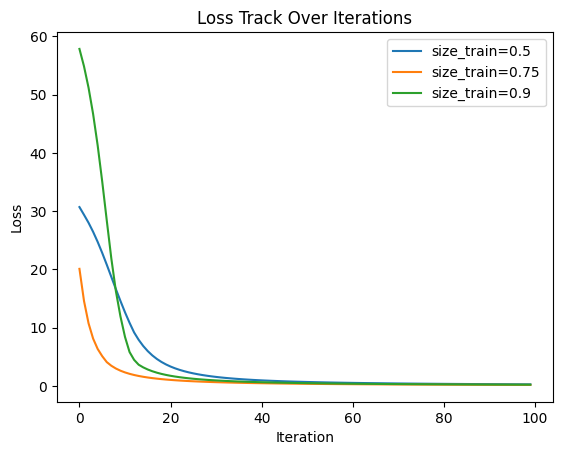


Results for size_train = 0.5:
Matthews Correlation Coefficient (MCC): 0.00
Final output on test set:
[30.70023737 29.37361989 28.00320763 26.45293296 24.72246239 22.82726721
 20.80305093 18.70636332 16.60893485 14.58446378 12.6380208  10.83338204
  9.17672771  7.91080758  6.84979522  5.96657765  5.23275801  4.62205852
  4.11176717  3.68301463  3.3204748   3.01184885  2.7473194   2.51905696
  2.32080529  2.14754647  1.99523604  1.86059598  1.74095368  1.63411689
  1.53827641  1.4519302   1.37382392  1.30290418  1.23828146  1.17920075
  1.12501794  1.07518093  1.0292143   0.98670691  0.94730168  0.91068729
  0.87659129  0.84477435  0.81502556  0.7871584   0.76100742  0.73642545
  0.71328115  0.69145702  0.67084767  0.6513583   0.63290348  0.61540601
  0.59879597  0.58300993  0.56799021  0.55368423  0.54004403  0.52702574
  0.51458915  0.50269738  0.49131654  0.48041541  0.46996522  0.4599394
  0.45031338  0.44106442  0.43217144  0.42361484  0.41537644  0.4074393
  0.39978764  0.39240676

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class NeuralNetwork:
    def __init__(self, x, y, middle_layer_dim, learning_rate):
        self.x = self.preprocess_data(x)
        self.y = self.preprocess_labels(y)
        self.middle_layer_dim = middle_layer_dim
        self.learning_rate = learning_rate

        input_dim = self.x.shape[1]  # Number of features (p)
        output_dim = 1  # Binary classification

        # Initialize weights and biases
        self.weights1 = np.random.randn(input_dim, middle_layer_dim)
        self.weights2 = np.random.randn(middle_layer_dim, output_dim)
        self.bias1 = np.random.randn(middle_layer_dim)
        self.bias2 = np.random.randn(output_dim)

    def preprocess_data(self, x):
        if isinstance(x, pd.DataFrame):
            processed_data = []
            for row in x.values:
                processed_row = []
                for cell in row:
                    try:
                        processed_row.extend([float(value) for value in cell.split(',')])
                    except ValueError:
                        continue
                if processed_row:
                    processed_data.append(processed_row)
            x = np.array(processed_data)
        elif isinstance(x, np.ndarray) or isinstance(x, list):
            x = np.array([np.array(row.split(','), dtype=float) if isinstance(row, str) else row for row in x])
        return np.array(x, dtype=float)

    def preprocess_labels(self, y):
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.iloc[:, -1]  # Assuming the last column contains the labels
            y = y.apply(lambda label: 1 if 'French' in str(label) else 0).values  # Binarize labels
        elif isinstance(y, np.ndarray) or isinstance(y, list):
            y = np.array([1 if 'French' in str(label) else 0 for label in y])
        return np.array(y, dtype=float)

    def feedforward(self):
        self.z1 = np.dot(self.x, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.output = (self.a2 > 0.5).astype(int)
        return self.a2

    def backpropagation(self):
        error = self.a2 - self.y.reshape(-1, 1)
        dz2 = error * sigmoid_derivative(self.z2)
        dweights2 = np.dot(self.a1.T, dz2)
        dbias2 = np.sum(dz2, axis=0)
        dz1 = np.dot(dz2, self.weights2.T) * sigmoid_derivative(self.z1)
        dweights1 = np.dot(self.x.T, dz1)
        dbias1 = np.sum(dz1, axis=0)
        return dweights1, dweights2, dbias1, dbias2

    def train(self, simulations_n):
        loss_track = np.zeros(simulations_n)

        for i in range(simulations_n):
            self.feedforward()
            loss = np.sum((self.y.reshape(-1, 1) - self.a2) ** 2)
            loss_track[i] = loss
            dweights1, dweights2, dbias1, dbias2 = self.backpropagation()
            self.weights1 -= self.learning_rate * dweights1
            self.weights2 -= self.learning_rate * dweights2
            self.bias1 -= self.learning_rate * dbias1
            self.bias2 -= self.learning_rate * dbias2

        return loss_track

class train_NN(NeuralNetwork):
    def __init__(self, x, y, middle_layer_dim, learning_rate, size_train):
        self.size_train = size_train

        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size_train, random_state=42)

        # Preprocess the training and testing data
        self.x_train = self.preprocess_data(x_train)
        self.x_test = self.preprocess_data(x_test)
        self.y_train = self.preprocess_labels(y_train)
        self.y_test = self.preprocess_labels(y_test)

        super().__init__(self.x_train, self.y_train, middle_layer_dim, learning_rate)

    def train(self, simulations_n):
        loss_track = np.zeros(simulations_n)

        for i in range(simulations_n):
            self.feedforward()
            loss = np.sum((self.y.reshape(-1, 1) - self.a2) ** 2)
            loss_track[i] = loss
            dweights1, dweights2, dbias1, dbias2 = self.backpropagation()
            self.weights1 -= self.learning_rate * dweights1
            self.weights2 -= self.learning_rate * dweights2
            self.bias1 -= self.learning_rate * dbias1
            self.bias2 -= self.learning_rate * dbias2

        return loss_track

    def evaluate(self):
        # Predict on the test set
        self.x, self.y = self.x_test, self.y_test
        self.feedforward()
        mcc = matthews_corrcoef(self.y_test, self.output)
        return mcc

# Load the data
geno_path = '/content/drive/MyDrive/geno_6'
ind_path = '/content/drive/MyDrive/ind_6'

# Assuming the files are in a tab-separated format
geno = pd.read_csv(geno_path, sep='\t', header=None)
ind = pd.read_csv(ind_path, sep='\t', header=None)

# Preprocess the data
def preprocess_geno(geno_df):
    if isinstance(geno_df, pd.DataFrame):
        processed_data = []
        for row in geno_df.values:
            processed_row = []
            for cell in row:
                try:
                    processed_row.extend([float(value) for value in cell.split(',')])
                except ValueError:
                    continue
            if processed_row:
                processed_data.append(processed_row)
        return np.array(processed_data)
    elif isinstance(geno_df, np.ndarray) or isinstance(geno_df, list):
        return np.array([np.array(row.split(','), dtype=float) if isinstance(row, str) else row for row in geno_df])

def preprocess_ind(ind_df):
    return np.array([1 if 'French' in str(label) else 0 for label in ind_df.iloc[:, -1]])

geno = preprocess_geno(geno)
labels = preprocess_ind(ind)

# Function to train and evaluate the model with different size_train values
def train_and_evaluate(size_train):
    print(f"\nTraining with size_train = {size_train}")
    nn = train_NN(geno, labels, middle_layer_dim=8, learning_rate=0.01, size_train=size_train)
    loss_track = nn.train(simulations_n=100)
    mcc = nn.evaluate()
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

    # Plot the loss track
    plt.plot(loss_track, label=f'size_train={size_train}')
    plt.title('Loss Track Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    return loss_track, mcc

# Train and evaluate with different size_train values
size_train_values = [0.5, 0.75, 0.9]
results = {}
for size_train in size_train_values:
    loss_track, mcc = train_and_evaluate(size_train)
    results[size_train] = {'loss_track': loss_track, 'mcc': mcc}

plt.show()

# Print the final output for each size_train
for size_train, result in results.items():
    print(f"\nResults for size_train = {size_train}:")
    print(f"Matthews Correlation Coefficient (MCC): {result['mcc']:.2f}")
    print(f"Final output on test set:\n{result['loss_track']}")

שאלה 2

סעיף א

In [1]:
# Import the necessary packages
from keras.datasets import mnist
import numpy as np

# Load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Flatten each 28x28 image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# Print the shapes of the datasets after reshaping
print("X_train shape after reshaping:", X_train.shape)
print("X_test shape after reshaping:", X_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train shape after reshaping: (60000, 784)
X_test shape after reshaping: (10000, 784)


סעיף ב

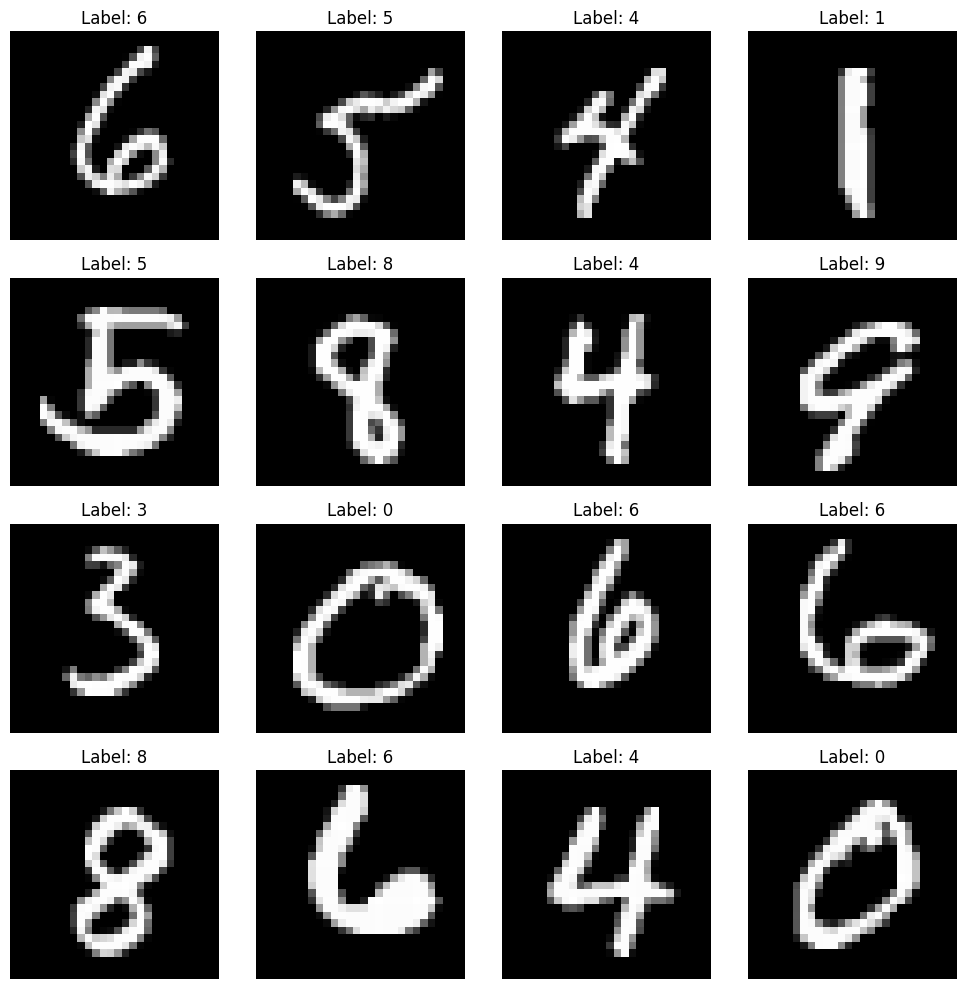

In [2]:
import matplotlib.pyplot as plt
import random

def display_image_from_vector(vector, label):
    # Reshape the vector back to a 28x28 image
    image = vector.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Function to display 16 random images from the dataset
def display_random_images(X, y, num_images=16):
    plt.figure(figsize=(10, 10))
    indices = random.sample(range(X.shape[0]), num_images)
    for i, idx in enumerate(indices):
        plt.subplot(4, 4, i+1)
        display_image_from_vector(X[idx], y[idx])
    plt.tight_layout()
    plt.show()

# Display 16 random images from the training set
display_random_images(X_train, y_train)


סעיף ג
לאחר נרמול באמצעות חלוקה בטווח המקסימום של פיקסלים (0-255), נבנה שתי שכבות כמבוקש

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the model
model = Sequential()

# Add the first dense layer with 512 neurons and relu activation
model.add(Dense(512, activation='relu', input_shape=(784,)))


מספר הנוירונים בשכבה השניה יתאים למספר המחלקות שאנו מעוניינים לחזות, דהיינו 10 מחלקות (כמספר הספרות).
פונקציית האקטיבציה שנבחר בה היא
 softmax,
  משום שהיא תתן הפלגות הסתברות על פנעי כל המחלקות אשר מסתכמת ב-1.


In [4]:

# Add the second dense layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


סעיף ד

In [5]:

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the accuracy index result
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/10
1500/1500 [==============================] - 26s 16ms/step - loss: 0.2229 - accuracy: 0.9343 - val_loss: 0.1201 - val_accuracy: 0.9656
Epoch 2/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0883 - accuracy: 0.9742 - val_loss: 0.0873 - val_accuracy: 0.9744
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0570 - accuracy: 0.9822 - val_loss: 0.0863 - val_accuracy: 0.9751
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0907 - val_accuracy: 0.9742
Epoch 5/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0864 - val_accuracy: 0.9753
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0814 - val_accuracy: 0.9775
Epoch 7/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0864 -

סעיף ה

נוסיף את שכבת
`dropout`


על מנת למנוע over fitting

באמצעות הגדרה אקראית של חלק מיחידות הקלט ל-0 במהלך אימון המודל.

In [6]:

from keras.layers import Dropout

# Create the model
model = Sequential()

# Add the first dense layer with 512 neurons and relu activation
model.add(Dense(512, activation='relu', input_shape=(784,)))

# Add a Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the second dense layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the accuracy index result
print(f'Test accuracy: {test_accuracy:.4f}')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2965 - accuracy: 0.9111 - val_loss: 0.1321 - val_accuracy: 0.9618
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1482 - accuracy: 0.9542 - val_loss: 0.1052 - val_accurac

נראה שהוספת שכבה שיפרה את דיוק הבדיקה מ-97.98% ל-98.07%.

אמנם, שימוש בשתי שכבות בלבד כמו  בסעיף ג נתן דיוק אימ ון גבוה יותר, אבל האימות הסופי נמוך יותר מאשר הוספת השכבה השלישית. זה מצביע על כך שמניעת התאמת-יתר (over-fitting)

סייעה למודל לבצע הכללה טובה יותר.

כעת נוסיף עוד שכבה צפופנ עם 256 נוירונים ונפעיל
relu
בין השכבה הצפופה הראשונה לשכבת
dropout

In [7]:
from keras.layers import Dense, Dropout

# Create the model with an additional dense layer
model = Sequential()

# Add the first dense layer with 512 neurons and relu activation
model.add(Dense(512, activation='relu', input_shape=(784,)))

# Add an additional dense layer with 256 neurons and relu activation
model.add(Dense(256, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output dense layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the accuracy index result
print(f'Test accuracy: {test_accuracy:.4f}')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 23s 14ms/step - loss: 0.2579 - accuracy: 0.9213 - val_loss: 0.1119 - val_accuracy: 0.9668
Epoc

נראה שהוספת השכבה הצפופה הובילה לדיוק גבוה יותר עבור האימון, אבל להפחתת האימות ודיוק הבדיקה. כתוצאה מכך נסיק שהוספת השכבה ה צפופה מתאימה את נתוני האימון במידה רבה מעט יותר מאשר ללא הוספת השכבה הצפופה.
נסיק גם כי לא היה שיפור משמעותי ובהיבט של הכללת נתונים חדשים, המיודל נחלש.

סעיף ו

נשתמש ברשת השניה, עם שכבת ה-
DROPOUT

Epoch 1/20
750/750 [==============================] - 14s 18ms/step - loss: 0.8482 - accuracy: 0.7370 - val_loss: 0.2710 - val_accuracy: 0.9194
Epoch 2/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3487 - accuracy: 0.8991 - val_loss: 0.1904 - val_accuracy: 0.9452
Epoch 3/20
750/750 [==============================] - 12s 16ms/step - loss: 0.2536 - accuracy: 0.9256 - val_loss: 0.1531 - val_accuracy: 0.9561
Epoch 4/20
750/750 [==============================] - 12s 16ms/step - loss: 0.2002 - accuracy: 0.9413 - val_loss: 0.1286 - val_accuracy: 0.9619
Epoch 5/20
750/750 [==============================] - 12s 17ms/step - loss: 0.1668 - accuracy: 0.9502 - val_loss: 0.1138 - val_accuracy: 0.9669
Epoch 6/20
750/750 [==============================] - 12s 17ms/step - loss: 0.1415 - accuracy: 0.9578 - val_loss: 0.1046 - val_accuracy: 0.9690
Epoch 7/20
750/750 [==============================] - 12s 15ms/step - loss: 0.1238 - accuracy: 0.9625 - val_loss: 0.0980 - val_accuracy:

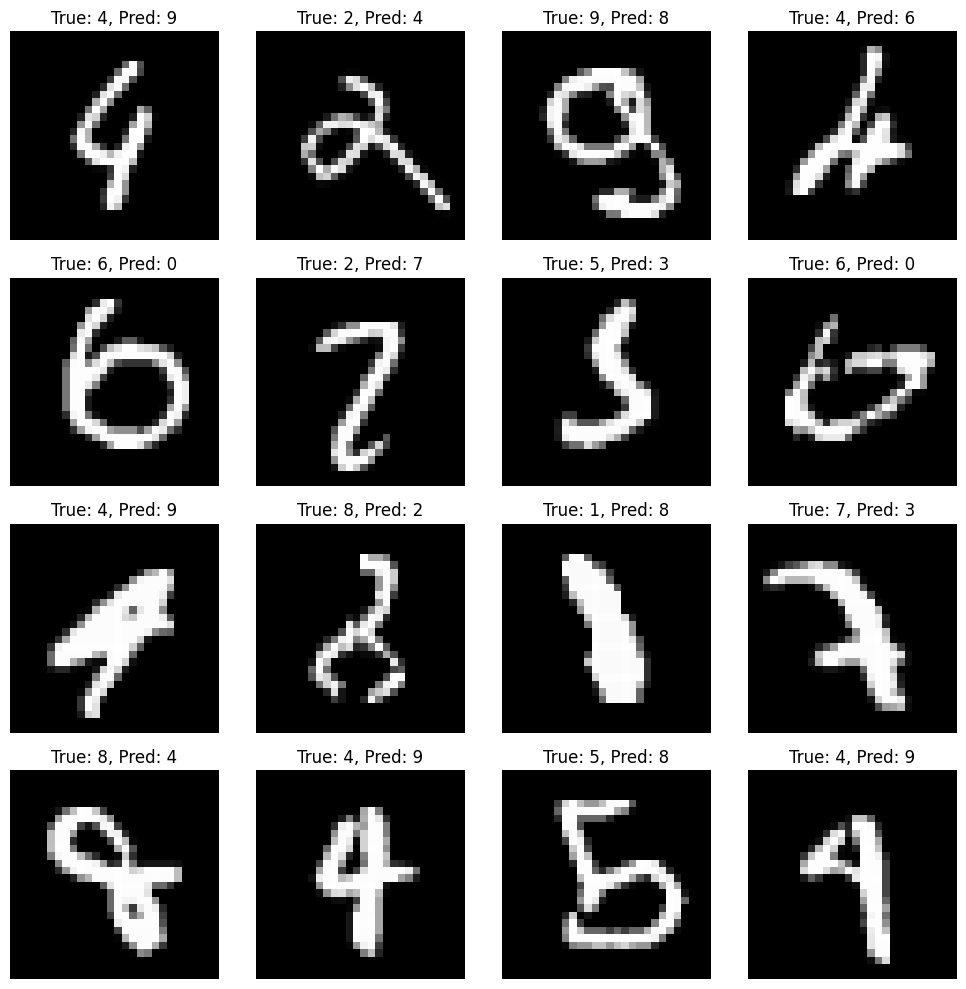

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten each 28x28 image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the model with additional layers and adjustments
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify misclassified images
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Function to display misclassified images
def display_misclassified_images(X, y_true, y_pred_classes, misclassified_indices, num_images=16):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(misclassified_indices[:num_images]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[idx]}, Pred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first 16 misclassified images
display_misclassified_images(X_test, y_true, y_pred_classes, misclassified_indices)


סעיף ז

על מנת לבנות מודל של רשת נוירונים, ראשית טענו את מערך הנתונים המבוקש, אחרי כן נרמלנו את נתוני הקלט באמצעות חלוקת ערכי הפיקסלים ב-255 שהוא טווח המקסימום של פיקסלים. שיטחנו כל תמ ונה בגודל 28*28 לאורך 784.
לאחר מכן הצגנו מספר תמונות באקראיות עם סיווג נכון.
לאחר מכן בנינו מודל עם שכבה צפיפות עם

512
נוירונים


ועם פונקצייה
RELU


ואחרי כן הרכבנו את המודל ואימנו אותו על פני 10. הערכנו את המודל באמצעות תוצאת מדד הדיוק ובדיקת תוצאות האימון והבדיקה.

 מודל שני עם שכבת DROPOUT

בנינו מודל עם השכבות הקודמת וכעת הוספנו שכבת DROPOUT,
אימנו את המודל ובחנו את תוצאותיו

לאחר מכן בנינו מודל זהה אך עם שכבה צפופה נוספת. בחננו את תוצאות כל המודלים

לאחר מכן בחרנו את המודל אשר הציג תוצאה טובה ביותר ועבורו הצגנו את התמונות שהשיגו חיזוי שגוי